## Data Pre-processing

In [1]:
# !pip install pyarrow

In [2]:
# !pip install sidetable

### 1. Importing libraries

In [3]:
import pandas as pd

import seaborn as sns

import os
import matplotlib.pyplot as plt

import numpy as np
import sidetable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from scipy.stats import zscore

In [4]:
os.getcwd()

'C:\\Users\\40101410\\OneDrive - Anheuser-Busch InBev\\Upskill2024\\direct-marketing'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '.python-version',
 'data',
 'direct-marketing-eda.ipynb',
 'direct-marketing-pre-processing.ipynb',
 'direct-marketing-regression.ipynb',
 'executed_direct-marketing-eda.ipynb',
 'hello.py',
 'main.ipynb',
 'pyproject.toml',
 'raw_data.parquet',
 'README.md',
 'uv.lock']

In [6]:
# Saving data for further pre-processing
df = pd.read_parquet('raw_data.parquet', engine='pyarrow')
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
# Change Children and Catalogue column as Object
df = df.astype({'Children': 'object', 'Catalogs': 'object'})

In [9]:
categorical_variables  = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children',
       'History', 'Catalogs'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   object
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   object
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [11]:
categorical_variables = categorical_variables.tolist()
categorical_variables

['Age',
 'Gender',
 'OwnHome',
 'Married',
 'Location',
 'Children',
 'History',
 'Catalogs']

In [12]:
numerical_variables  = df.select_dtypes(include=['int64']).columns
numerical_variables

Index(['Salary', 'AmountSpent'], dtype='object')

In [13]:
numerical_columns = numerical_variables.tolist()
numerical_columns

['Salary', 'AmountSpent']

### Check for outliers in numeric variables

In [14]:
# Calculate Z-Score for all numeric columns
z_scores = df[numerical_variables].apply(zscore)
# Set threshold for Z-Score
threshold = 3
outliers = (z_scores.abs() > threshold)


{'whiskers': [<matplotlib.lines.Line2D at 0x292d124d430>,
 'caps': [<matplotlib.lines.Line2D at 0x292d124da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x292d124d160>],
 'medians': [<matplotlib.lines.Line2D at 0x292d124df70>],
 'fliers': [<matplotlib.lines.Line2D at 0x292d3261280>],
 'means': []}

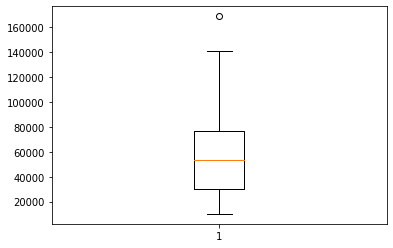

In [15]:
plt.boxplot(df['Salary'])

In [16]:
# Check outlier data 
outlier_data = df[(outliers.any(axis=1))]
outlier_data

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
14,Old,Female,Own,Married,Far,110000,0,High,24,5564
69,Middle,Male,Own,Single,Far,72300,0,High,24,4182
91,Old,Male,Own,Married,Close,134500,0,High,24,4558
152,Middle,Female,Own,Married,Far,109800,0,High,18,4279
169,Middle,Male,Own,Married,Far,140000,0,High,12,4894
216,Middle,Female,Rent,Married,Far,120800,1,High,24,5830
403,Middle,Male,Own,Married,Far,113300,1,High,18,5151
496,Middle,Male,Own,Married,Far,123000,1,High,24,5878
637,Middle,Male,Own,Married,Far,89500,0,High,24,5209
743,Middle,Male,Own,Married,Close,122700,1,None,18,4984


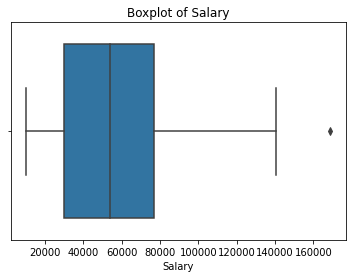

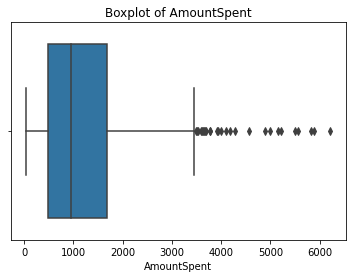

In [17]:
# Boxplot for numeric columns
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [18]:
nominal_columns = ['Gender', 'OwnHome', 'Married', 'Location']
ordinal_columns = ['Children', 'Catalogs']

In [19]:
# Nominal Columns
# Outliers in nominal data are rare categories or invalid entries.
for col in nominal_columns:
    category_counts = df[col].value_counts()
    rare_categories = category_counts[category_counts < 5].index
    print(col)
    print(rare_categories)

    # Replace rare categories with 'Other'
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    
# No column has rare categories

Gender
Index([], dtype='object')
OwnHome
Index([], dtype='object')
Married
Index([], dtype='object')
Location
Index([], dtype='object')


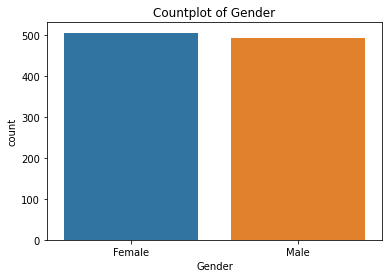

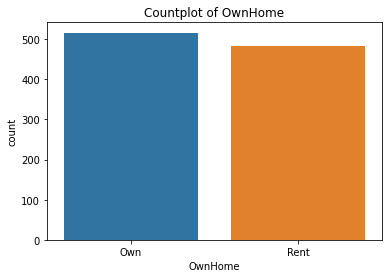

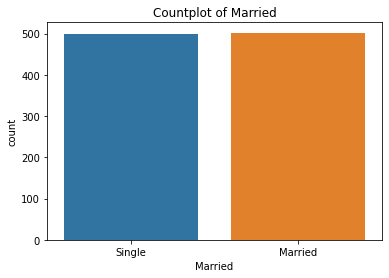

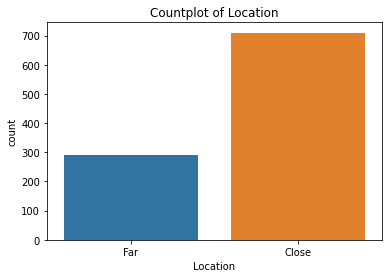

In [20]:
# Countplot for nominal columns - visual representation of outliers
for col in nominal_columns:
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

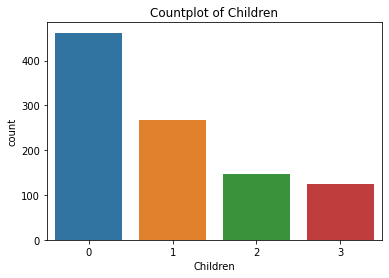

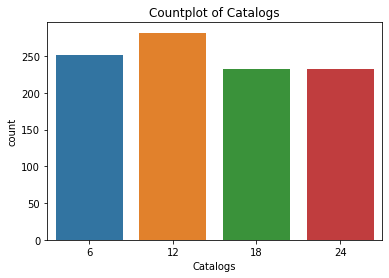

In [21]:
# Countplot for ordinal columns - visual representation of outliers - no unexpected or invalid values
for col in ordinal_columns:
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

Summary
1. No treatment for missing values 
2. No outlier treatment required

#### Column Transformers

In [22]:
# Numerical columns: StandardScaler
numerical_transformer = StandardScaler()

# Nominal Catgorical Variables
nominal_encoder = OneHotEncoder()

# Ordinal Catgorical Variables
ordinal_encoder = OrdinalEncoder()

In [23]:
# pre-defined order for Age and History columns
Age_order = [["Young", "Middle", "Old"]]
History_order = [['None', 'Low', 'Medium', 'High']]

In [24]:
# Encode nominal features using OneHotEncoder
# Encode ordinal features using Ordinal Encoder
# Use pre-defined coding for Age and History variables
# Stadardize Numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", nominal_encoder, nominal_columns),
        ("ordinal_age", OrdinalEncoder(categories = Age_order), ['Age']),
        ("ordinal_history", OrdinalEncoder(categories = History_order), ['History']),
        ("ordinal", ordinal_encoder, ordinal_columns),
        ("num", numerical_transformer, numerical_columns)],
    remainder="passthrough"  # Keep other columns (e.g., Age) as is
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

In [25]:
# Convert to data frame
transformed_df = pd.DataFrame(
    transformed_data,
    columns=preprocessor.get_feature_names_out()
)
transformed_df.head()

,onehot__Gender_Female,onehot__Gender_Male,onehot__OwnHome_Own,onehot__OwnHome_Rent,onehot__Married_Married,onehot__Married_Single,onehot__Location_Close,onehot__Location_Far,ordinal_age__Age,ordinal_history__History,ordinal__Children,ordinal__Catalogs,num__Salary,num__AmountSpent
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,-0.281164,-0.480716
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.244963,0.105383
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-1.392239,-0.958548
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.963893,1.269254
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0,0.401820,0.090809


In [26]:
# Get mappings
onehot_mapping = {
    col: list(categories) for col, categories in zip(nominal_columns, preprocessor.named_transformers_["onehot"].categories_)
}
ordinal_mapping = {
    col: list(categories) for col, categories in zip(ordinal_columns, preprocessor.named_transformers_["ordinal"].categories_)
}


In [27]:
# Retrive mappings

print("OneHot Mapping:", onehot_mapping)
print("Ordinal Mapping:", ordinal_mapping)
print("Age Mapping:", preprocessor.named_transformers_["ordinal_age"].categories_)
print("History Mapping:", preprocessor.named_transformers_["ordinal_history"].categories_)

OneHot Mapping: {'Gender': ['Female', 'Male'], 'OwnHome': ['Own', 'Rent'], 'Married': ['Married', 'Single'], 'Location': ['Close', 'Far']}
Ordinal Mapping: {'Children': [0, 1, 2, 3], 'Catalogs': [6, 12, 18, 24]}
Age Mapping: [array(['Young', 'Middle', 'Old'], dtype=object)]
History Mapping: [array(['None', 'Low', 'Medium', 'High'], dtype=object)]


In [28]:
# Saving data for further pre-processing
transformed_df.to_parquet('processed_data.parquet', index=False)